In [1]:
from pathlib import Path
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import japanize_matplotlib
import datetime as dt
from sklearn.linear_model import LinearRegression

In [2]:
here = Path().resolve()
DATA_DIR = here.parent/'data'

In [3]:
csv_df = pd.read_csv(DATA_DIR/'cape.csv', dtype={'Date': str})

#不要列の削除
del csv_df['Unnamed: 13']
del csv_df['Unnamed: 15']

In [4]:
csv_df.columns

Index(['Date', 'P', 'D', 'E', 'CPI', 'Fraction', 'Rate GS10', 'Price',
       'Dividend', ' Price ', 'Earnings', ' Earnings ', 'CAPE', 'TR CAPE',
       'Yield', 'Returns', 'Returns.1', 'Real Return', 'Real Return.1',
       'Returns.2'],
      dtype='object')

In [5]:
csv_df.dtypes

Date              object
P                float64
D                float64
E                float64
CPI              float64
Fraction         float64
Rate GS10        float64
Price            float64
Dividend         float64
 Price           float64
Earnings         float64
 Earnings        float64
CAPE             float64
TR CAPE          float64
Yield            float64
Returns          float64
Returns.1        float64
Real Return      float64
Real Return.1    float64
Returns.2        float64
dtype: object

In [6]:
rename_dict = {
    'Date': '年月',
    'P': '価格',
    'D': '配当',
    'E': '利益',
    'CPI': '物価',
    'Fraction': '年月_num',
    'Rate GS10': '10年債金利',
    'Price': '物価調整後価格',
    'Dividend': '物価調整後配当',
    ' Price ': '物価調整後TR',
    'Earnings': '物価調整後利益',
    'CAPE': 'CAPE',
    'TR CAPE': 'TR_CAPE',
    'Yield': '超過CAPE',
    'Returns': '月次債権利回り',
    'Returns.1': '月次物価調整後利回り?',
    'Real Return': '株10年平均利回り',
    'Real Return.1': '債権10年平均利回り',
    'Returns.2': '超過10年平均利回り',
}
data_df = csv_df.rename(columns = rename_dict)

In [7]:
def str2dt(s):
    if len(s)==6:
        s += '0'
        assert s[-2:]=='10'
    assert len(s) == 7
    return dt.datetime.strptime(s, '%Y.%m')

In [8]:
data_df['年月'] = data_df['年月'].apply(str2dt) #pd.to_datetime(data_df['年月'], format='%Y.%m')

In [9]:
data_df.set_index('年月').sort_index().loc[dt.datetime(2020, 12, 1):]

,価格,配当,利益,物価,年月_num,10年債金利,物価調整後価格,物価調整後配当,物価調整後TR,物価調整後利益,Earnings,CAPE,TR_CAPE,超過CAPE,月次債権利回り,月次物価調整後利回り?,株10年平均利回り,債権10年平均利回り,超過10年平均利回り
年月,,,,,,,,,,,,,,,,,,,
2020-12-01,3695.310000,58.278846,94.130000,260.474,2020.958333,0.93,4119.085905,64.962229,2.601110e+06,104.924771,66257.641366,33.765591,37.026596,0.037727,0.986675,57.294507,NaN,NaN,NaN
2021-01-01,3793.748421,58.063693,105.486667,261.582,2021.041667,1.08,4210.900923,64.448253,2.662481e+06,117.085756,74031.331862,34.512432,37.841180,0.035535,0.984128,56.291598,NaN,NaN,NaN
2021-02-01,3883.432105,57.848540,116.843333,263.014,2021.125000,1.26,4286.977479,63.859849,2.713948e+06,128.985064,81656.300519,35.103907,38.480638,0.033301,0.968990,55.096542,NaN,NaN,NaN
2021-03-01,3910.508261,57.633387,128.200000,264.877,2021.208333,1.61,4286.504759,63.174854,2.716981e+06,140.526467,89072.053757,35.042545,38.400680,0.029582,0.998598,53.012522,NaN,NaN,NaN
2021-04-01,4141.176190,57.710605,138.386667,267.054,2021.291667,1.64,4502.347095,62.743811,2.857106e+06,150.456000,95476.592713,36.719814,40.219749,0.028158,1.003198,52.506636,NaN,NaN,NaN
2021-05-01,4167.849500,57.787824,148.573333,269.195,2021.375000,1.62,4495.307354,62.328073,2.855935e+06,160.246381,101806.881658,36.552134,40.014691,0.028818,1.010550,52.255601,NaN,NaN,NaN
2021-06-01,4238.489545,57.865042,158.760000,271.696,2021.458333,1.52,4529.416138,61.836853,2.880878e+06,169.657162,107908.315833,36.696258,40.148050,0.030762,1.019847,52.320805,NaN,NaN,NaN
2021-07-01,4363.712857,58.328189,164.316667,273.003,2021.541667,1.32,4640.909475,62.033377,2.955080e+06,174.754573,111274.269333,37.443383,40.937356,0.032617,1.004823,53.103769,NaN,NaN,NaN
2021-08-01,4454.206364,58.791336,169.873333,273.567,2021.625000,1.28,4727.385052,62.397038,3.013454e+06,180.291749,114926.315287,37.973501,41.486837,0.032573,0.992726,53.249899,NaN,NaN,NaN


In [10]:
for i in range(1, 41):
    if i == 10:
        continue
    f = data_df['物価調整後TR'].shift(-12*i)
    n = data_df['物価調整後TR']
    data_df[f'株{i}年平均利回り']= (f/n)**(1/i)-1

In [11]:
data_df['1/CAPE'] = 1/data_df['CAPE']

In [12]:
data_df.tail()

,年月,価格,配当,利益,物価,年月_num,10年債金利,物価調整後価格,物価調整後配当,物価調整後TR,...,株32年平均利回り,株33年平均利回り,株34年平均利回り,株35年平均利回り,株36年平均利回り,株37年平均利回り,株38年平均利回り,株39年平均利回り,株40年平均利回り,1/CAPE
1812,2022-01-01,4573.815500,60.921403,NaN,281.148,2022.041667,1.76,4723.435562,62.914283,3.027482e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.027073
1813,2022-02-01,4435.980526,61.445689,NaN,283.716,2022.125000,1.93,4539.626831,62.881362,2.913029e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.028199
1814,2022-03-01,4391.265217,61.969974,NaN,287.504,2022.208333,2.13,4434.657951,62.582337,2.849018e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.028896
1815,2022-04-01,4391.296000,NaN,NaN,289.398,2022.291667,2.75,4405.665682,NaN,2.830392e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.029118
1816,2022-05-01,4175.480000,NaN,NaN,290.345,2022.375000,2.97,4175.480000,NaN,2.682510e+06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.030758


In [13]:
data_df.describe()['超過CAPE']

count    1697.000000
mean        0.046706
std         0.044180
min        -0.025777
25%         0.015868
50%         0.034669
75%         0.066709
max         0.235340
Name: 超過CAPE, dtype: float64

0.007460396410224002 0.015809072349193487 0.11029636085237904


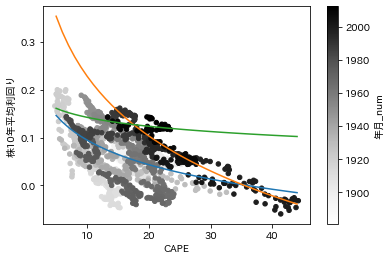

In [27]:
ax = data_df.plot.scatter(x='CAPE', y='株10年平均利回り', c='年月_num', cmap='Greys', sharex=False)
X = np.arange(5, 45, 1)
def f1(x):
    return -0.074*np.log(x) + 0.2651
def f2(x):
    return -0.18*np.log(x) + 0.6425
def f3(x):
    return -0.027*np.log(x) + 0.2043
ax.plot(X, f1(X))
ax.plot(X, f2(X))
ax.plot(X, f3(X))
print(f1(32.512228), f2(32.512228), f3(32.512228))

1800-01-01: 0.66x+0.0345 0.0509463167706008
1960-01-01: 1.22x+0.0166 0.04671991926222788
2000-01-01: 2.43x+0.0009 0.06107543363017813
2009-01-01: 0.76x+0.0868 0.10555525801826296


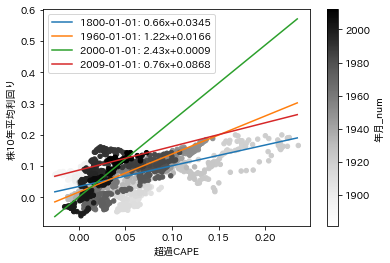

In [28]:
ax = data_df.plot.scatter(x='超過CAPE', y='株10年平均利回り', c='年月_num', cmap='Greys', sharex=False)
terms = ['1800-01-01','1960-01-01', '2000-01-01', '2009-01-01']
for t in terms:
    _f = data_df.eval('年月 >= @t and 超過CAPE == 超過CAPE and 株10年平均利回り==株10年平均利回り')
    y = data_df.loc[_f, '株10年平均利回り'].values
    x = data_df.loc[_f, ['超過CAPE']].values
    model_lr = LinearRegression()
    model_lr.fit(x, y)
    a = model_lr.coef_
    b = model_lr.intercept_
    X = np.arange(-0.025777,  0.235340, 0.01)
    label = f'{t}: {a[0]:.2f}x{"+" if b>0 else ""}{b:.4f}'
    ax.plot(X, a*X+b, label=label)
    print(label, a[0]*0.024713+b)
plt.legend()
plt.show()

<AxesSubplot:xlabel='年月'>

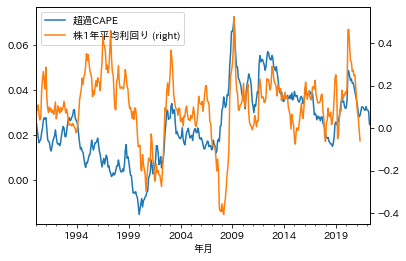

In [16]:
c = '株1年平均利回り'
data_df.query('年月 >= "1990-01-01"').set_index('年月')[['超過CAPE', c]].plot(secondary_y=c)

<AxesSubplot:xlabel='年月'>

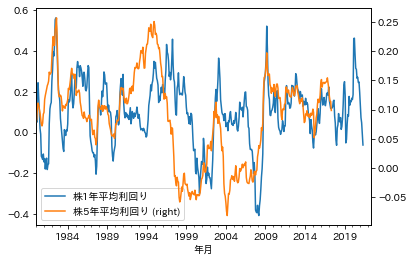

In [17]:
c1 = '株1年平均利回り'
c2 = '株5年平均利回り'
data_df.query('年月 >= "1980-01-01"').set_index('年月')[[c1, c2]].plot(secondary_y=c2)

<AxesSubplot:xlabel='超過CAPE', ylabel='株1年平均利回り'>

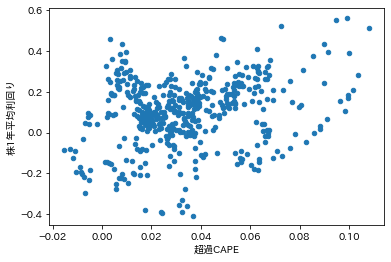

In [18]:
c1 = '超過CAPE'
c2 = '株1年平均利回り'
data_df.query('年月 >= "1980-01-01"').plot.scatter(x=c1, y=c2)

1800: 0.99x+0.0377 0.062185268709457744
1960: 1.14x+0.0385 0.06661492320330295
2000: 6.42x-0.1254 0.03336757357452999
2009: 5.65x-0.0803 0.059266120904949954


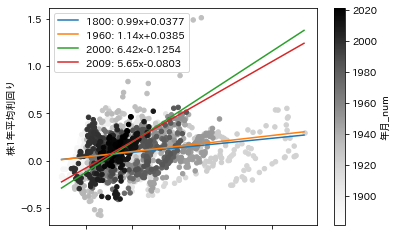

In [19]:
c = '株1年平均利回り'
ax = data_df.plot.scatter(x='超過CAPE', y=c, c='年月_num', cmap='Greys')
terms = [1800, 1960, 2000, 2009]
for t in terms:
    #data_df.query('年月 >= @t').plot.scatter(x='超過CAPE', y=c, c='年月_num', cmap='Greys')
    _f = data_df.eval(f'年月 >= "{t}-01-01" and 超過CAPE == 超過CAPE and {c}=={c}')
    y = data_df.loc[_f, c].values
    x = data_df.loc[_f, ['超過CAPE']].values
    model_lr = LinearRegression()
    model_lr.fit(x, y)
    a = model_lr.coef_
    b = model_lr.intercept_
    X = np.arange(-0.025777,  0.235340, 0.01)
    label = f'{t}: {a[0]:.2f}x{"+" if b>0 else ""}{b:.4f}'
    ax.plot(X, a*X+b, label=label)
    print(label, a[0]*0.024713+b)
plt.legend()
plt.show()

<AxesSubplot:xlabel='超過CAPE', ylabel='株1年平均利回り'>

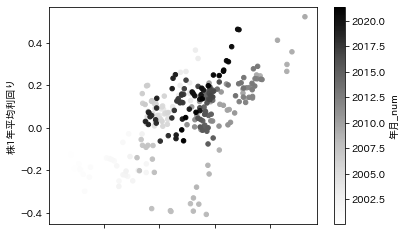

In [20]:
data_df.query('年月 >= "2000-01-01"').plot.scatter(x='超過CAPE', y='株1年平均利回り', c='年月_num', cmap='Greys')

In [21]:
data_df.set_index('年月').sort_index().loc[dt.datetime(1981,1,1):dt.datetime(1982,1,1), ['超過CAPE', '1/CAPE', '株1年平均利回り']]

,超過CAPE,1/CAPE,株1年平均利回り
年月,,,
1981-01-01,0.063642,0.107998,-0.143773
1981-02-01,0.063537,0.113252,-0.127376
1981-03-01,0.061569,0.110119,-0.178661
1981-04-01,0.056377,0.110065,-0.142636
1981-05-01,0.055819,0.113398,-0.124992
1981-06-01,0.062964,0.114086,-0.181095
1981-07-01,0.060110,0.118409,-0.157318
1981-08-01,0.054711,0.119050,-0.152703
1981-09-01,0.064820,0.131906,0.043728


In [22]:
data_df.tail(5)[['年月', '超過CAPE', '1/CAPE', ]]

,年月,超過CAPE,1/CAPE
1812,2022-01-01,0.031248,0.027073
1813,2022-02-01,0.031154,0.028199
1814,2022-03-01,0.030434,0.028896
1815,2022-04-01,0.024818,0.029118
1816,2022-05-01,0.024713,0.030758


In [41]:
data_df.query('"2019-10-01"<= 年月 <= "2022-05-01"')[['年月', '超過CAPE', '1/CAPE', 'CAPE']]

,年月,超過CAPE,1/CAPE,CAPE
1785,2019-10-01,0.035158,0.034673,28.841123
1786,2019-11-01,0.032874,0.033516,29.836868
1787,2019-12-01,0.031914,0.032969,30.331822
1788,2020-01-01,0.032266,0.032273,30.985220
1789,2020-02-01,0.035387,0.032542,30.729689
1790,2020-03-01,0.048801,0.040295,24.817169
1791,2020-04-01,0.048317,0.038569,25.927359
1792,2020-05-01,0.046163,0.036592,27.328481
1793,2020-06-01,0.044302,0.034676,28.838316
1794,2020-07-01,0.045002,0.033785,29.599195


<AxesSubplot:xlabel='年月'>

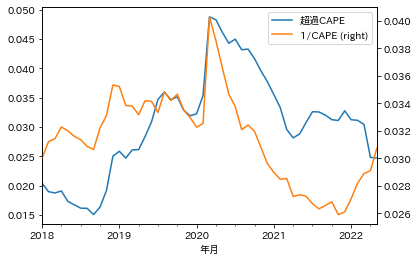

In [24]:
data_df.query('"2018-01-01"<= 年月').set_index('年月')[['超過CAPE', '1/CAPE', ]].plot(secondary_y='1/CAPE')

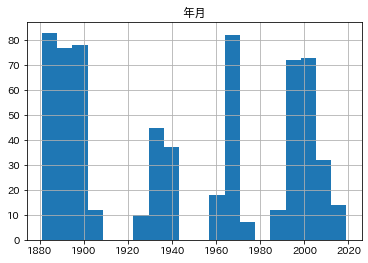

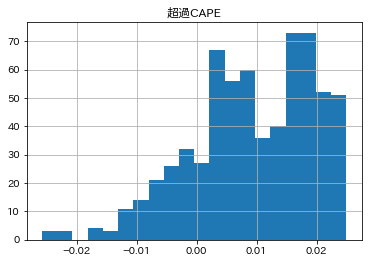

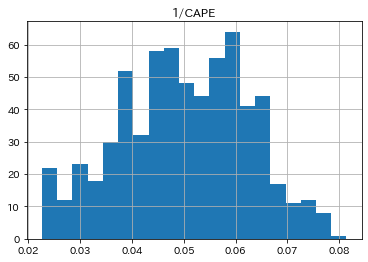

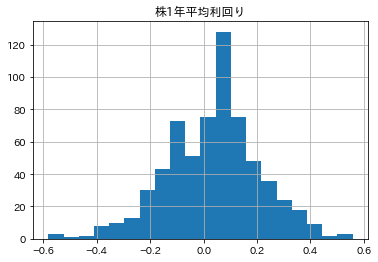

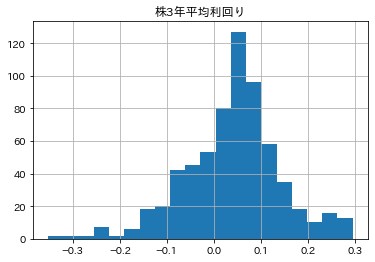

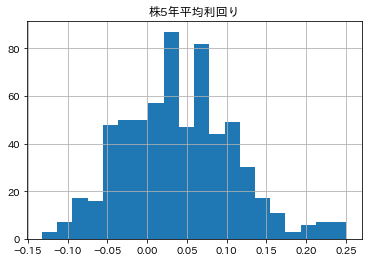

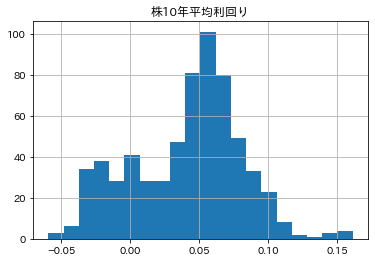

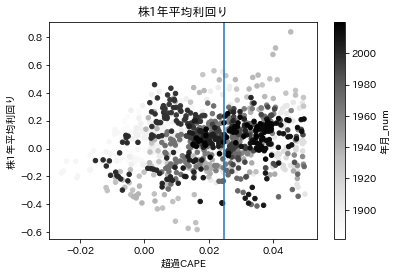

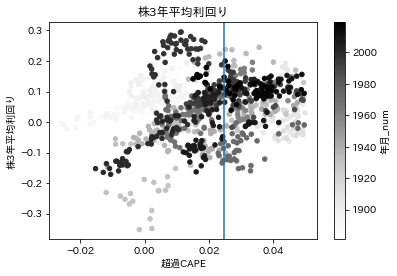

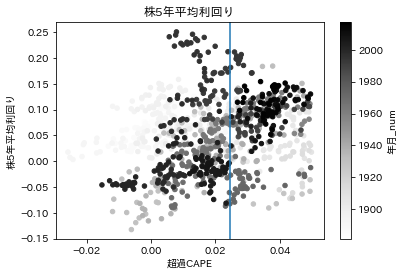

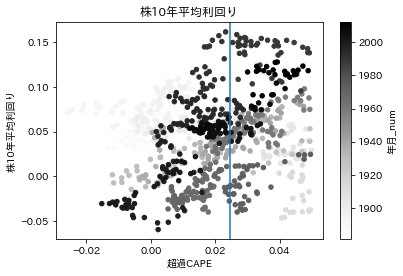

In [31]:
df = data_df.query('超過CAPE < 0.025 and 年月 < "2020-01-01"')[['年月', '超過CAPE', '1/CAPE', '株1年平均利回り', '株3年平均利回り', '株5年平均利回り', '株10年平均利回り']]
for c in df.columns:
    df[c].hist(bins=20)
    plt.title(c)
    plt.show()

df = data_df.query('超過CAPE < 0.05 and 年月 < "2020-01-01"')[['年月_num', '超過CAPE', '1/CAPE', '株1年平均利回り', '株3年平均利回り', '株5年平均利回り', '株10年平均利回り']]
for c in [1,3,5,10]:
    ax = df.plot.scatter(x='超過CAPE', y=f'株{c}年平均利回り', c='年月_num', sharex=False)
    ax.axvline(data_df['超過CAPE'].iloc[-1])
    plt.title(f'株{c}年平均利回り')
    plt.show()

In [33]:
data_df.query('0.02< 超過CAPE < 0.03')[['年月_num', '超過CAPE', '1/CAPE', '株1年平均利回り', '株3年平均利回り', '株5年平均利回り', '株10年平均利回り']].describe()

,年月_num,超過CAPE,1/CAPE,株1年平均利回り,株3年平均利回り,株5年平均利回り,株10年平均利回り
count,217.000000,217.000000,217.000000,215.000000,212.000000,198.000000,192.000000
mean,1964.191820,0.025192,0.052557,0.068573,0.055565,0.049717,0.049251
std,39.865782,0.002880,0.012247,0.164810,0.082746,0.068737,0.042422
min,1888.208333,0.020022,0.027233,-0.392883,-0.152441,-0.086849,-0.039682
25%,1938.041667,0.022882,0.044622,-0.037628,0.013047,-0.001432,0.029587
50%,1970.958333,0.025300,0.052385,0.080499,0.079192,0.047439,0.048368
75%,1993.541667,0.027705,0.061084,0.158482,0.109443,0.094242,0.065311
max,2022.375000,0.029886,0.088892,0.558100,0.238049,0.212115,0.161303


In [37]:
data_df.query('0.03< 超過CAPE < 0.04')[['年月_num', '超過CAPE', '1/CAPE', '株1年平均利回り', '株3年平均利回り', '株5年平均利回り', '株10年平均利回り']].describe()

,年月_num,超過CAPE,1/CAPE,株1年平均利回り,株3年平均利回り,株5年平均利回り,株10年平均利回り
count,182.000000,182.000000,182.000000,172.000000,159.000000,159.000000,120.000000
mean,1982.152930,0.035189,0.051289,0.092519,0.072959,0.079175,0.067079
std,37.769189,0.002860,0.015692,0.179720,0.064107,0.053642,0.041704
min,1888.958333,0.030060,0.025918,-0.412327,-0.159838,-0.090462,-0.026715
25%,1959.062500,0.032717,0.039058,0.005587,0.034156,0.052168,0.039680
50%,1993.750000,0.035235,0.048771,0.118540,0.092617,0.092099,0.062971
75%,2014.937500,0.037639,0.059347,0.183517,0.112098,0.111688,0.087154
max,2022.208333,0.039911,0.090189,0.675088,0.245181,0.184356,0.154028


In [38]:
data_df.query('0.04< 超過CAPE < 0.05')[['年月_num', '超過CAPE', '1/CAPE', '株1年平均利回り', '株3年平均利回り', '株5年平均利回り', '株10年平均利回り']].describe()

,年月_num,超過CAPE,1/CAPE,株1年平均利回り,株3年平均利回り,株5年平均利回り,株10年平均利回り
count,109.000000,109.000000,109.000000,109.000000,101.000000,101.000000,95.000000
mean,1952.027141,0.045179,0.060939,0.091722,0.055863,0.058661,0.049377
std,43.660056,0.002876,0.013659,0.220193,0.070338,0.063177,0.053270
min,1903.625000,0.040019,0.031966,-0.346303,-0.063370,-0.072148,-0.046302
25%,1911.291667,0.043002,0.052081,-0.078999,-0.008241,0.017690,0.017830
50%,1941.041667,0.045289,0.061332,0.086456,0.053892,0.069151,0.040233
75%,1988.375000,0.047477,0.071506,0.249253,0.110323,0.112039,0.090324
max,2020.791667,0.049853,0.102447,0.837030,0.196365,0.151388,0.151919


In [39]:
data_df.query('0.05< 超過CAPE < 0.06')[['年月_num', '超過CAPE', '1/CAPE', '株1年平均利回り', '株3年平均利回り', '株5年平均利回り', '株10年平均利回り']].describe()

,年月_num,超過CAPE,1/CAPE,株1年平均利回り,株3年平均利回り,株5年平均利回り,株10年平均利回り
count,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000,108.000000
mean,1952.759887,0.054447,0.073300,0.083161,0.089656,0.080316,0.057815
std,39.972925,0.002816,0.019697,0.185717,0.082544,0.075829,0.053460
min,1904.125000,0.050044,0.044256,-0.279448,-0.137203,-0.117565,-0.041517
25%,1910.833333,0.052350,0.060138,-0.059017,0.036102,0.019162,0.011444
50%,1956.416667,0.053884,0.069784,0.064874,0.086468,0.100830,0.068269
75%,1985.187500,0.056530,0.081727,0.226827,0.138810,0.132340,0.103352
max,2013.291667,0.059987,0.119050,0.568604,0.312748,0.235201,0.142901


In [48]:
data_df.query('15< CAPE < 20 and 年月 > "2000-01-01"')[['年月_num', '超過CAPE', '1/CAPE', '株1年平均利回り', '株3年平均利回り', '株5年平均利回り', '株10年平均利回り']].describe()

,年月_num,超過CAPE,1/CAPE,株1年平均利回り,株3年平均利回り,株5年平均利回り,株10年平均利回り
count,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000,16.000000
mean,2009.781250,0.049845,0.056530,0.175993,0.126620,0.145821,0.120020
std,0.773326,0.008248,0.006208,0.071566,0.028088,0.011294,0.007655
min,2008.791667,0.038008,0.050199,0.070318,0.084585,0.127889,0.110731
25%,2009.291667,0.043984,0.050738,0.109885,0.111833,0.138202,0.114374
50%,2009.666667,0.048736,0.054184,0.175749,0.123613,0.143181,0.118371
75%,2010.208333,0.055199,0.061404,0.234281,0.140782,0.156934,0.123400
max,2011.708333,0.066101,0.065899,0.298481,0.198217,0.161444,0.142901


In [50]:
data_df.query('20< CAPE < 25 and 年月 > "2000-01-01"')[['年月_num', '超過CAPE', '1/CAPE', '株1年平均利回り', '株3年平均利回り', '株5年平均利回り', '株10年平均利回り']].describe()

,年月_num,超過CAPE,1/CAPE,株1年平均利回り,株3年平均利回り,株5年平均利回り,株10年平均利回り
count,79.000000,79.000000,79.000000,79.000000,78.000000,78.000000,50.000000
mean,2010.239979,0.039022,0.044366,0.105730,0.098655,0.097978,0.089582
std,4.058496,0.010081,0.002923,0.167822,0.061521,0.036888,0.033747
min,2002.541667,0.015479,0.040070,-0.406870,-0.094194,-0.000839,0.037124
25%,2008.250000,0.032596,0.042295,0.069434,0.086841,0.079412,0.056228
50%,2011.375000,0.037586,0.044234,0.148004,0.104496,0.109628,0.091099
75%,2013.083333,0.048743,0.046826,0.197354,0.139929,0.125421,0.118012
max,2020.208333,0.057107,0.049876,0.461919,0.192796,0.151388,0.142230


In [51]:
data_df.query('25< CAPE < 30 and 年月 > "2000-01-01"')[['年月_num', '超過CAPE', '1/CAPE', '株1年平均利回り', '株3年平均利回り', '株5年平均利回り', '株10年平均利回り']].describe()

,年月_num,超過CAPE,1/CAPE,株1年平均利回り,株3年平均利回り,株5年平均利回り,株10年平均利回り
count,105.000000,105.000000,105.000000,105.000000,95.000000,88.000000,55.000000
mean,2010.979762,0.025934,0.037146,0.052492,0.037566,0.034273,0.049226
std,6.140102,0.009726,0.001755,0.141111,0.084963,0.067169,0.013368
min,2001.708333,0.008079,0.033348,-0.392883,-0.163167,-0.081209,0.006439
25%,2005.375000,0.017797,0.036155,0.007889,-0.031624,-0.019347,0.048610
50%,2007.791667,0.023333,0.037544,0.066074,0.073740,0.002398,0.052485
75%,2016.625000,0.035663,0.038563,0.128057,0.097967,0.093229,0.056816
max,2020.541667,0.048317,0.039918,0.463817,0.199946,0.154271,0.066091


In [52]:
data_df.query('30< CAPE < 35 and 年月 > "2000-01-01"')[['年月_num', '超過CAPE', '1/CAPE', '株1年平均利回り', '株3年平均利回り', '株5年平均利回り', '株10年平均利回り']].describe()

,年月_num,超過CAPE,1/CAPE,株1年平均利回り,株3年平均利回り,株5年平均利回り,株10年平均利回り
count,39.000000,39.000000,39.000000,36.000000,27.000000,10.000000,10.000000
mean,2014.866453,0.021518,0.031565,0.026350,0.076659,0.014050,0.003706
std,7.963385,0.011610,0.001282,0.158716,0.076869,0.017280,0.004959
min,2001.208333,0.002855,0.028896,-0.275250,-0.050559,-0.007225,-0.004721
25%,2009.875000,0.013737,0.030834,-0.063482,0.002911,0.000502,0.000858
50%,2018.375000,0.019164,0.031843,0.049625,0.108825,0.008560,0.003815
75%,2020.083333,0.029300,0.032484,0.144263,0.144001,0.032392,0.005760
max,2022.375000,0.043306,0.033331,0.271824,0.178695,0.035460,0.013214


In [53]:
data_df.query('35< CAPE < 40 and 年月 > "2000-01-01"')[['年月_num', '超過CAPE', '1/CAPE', '株1年平均利回り', '株3年平均利回り', '株5年平均利回り', '株10年平均利回り']].describe()

,年月_num,超過CAPE,1/CAPE,株1年平均利回り,株3年平均利回り,株5年平均利回り,株10年平均利回り
count,18.000000,18.000000,18.000000,9.000000,5.000000,5.000000,5.000000
mean,2015.884259,0.022360,0.026977,-0.089530,-0.072164,-0.024054,-0.012316
std,9.529147,0.014835,0.000902,0.107348,0.021562,0.011519,0.007313
min,2000.791667,-0.005150,0.025400,-0.231733,-0.097195,-0.041035,-0.021143
25%,2006.125000,0.009902,0.026396,-0.155097,-0.090219,-0.030377,-0.017954
50%,2021.416667,0.030941,0.026943,-0.141528,-0.070455,-0.018969,-0.011259
75%,2021.770833,0.031846,0.027331,-0.009350,-0.056381,-0.017251,-0.008182
max,2022.125000,0.033301,0.028537,0.073355,-0.046570,-0.012637,-0.003041


In [45]:
data_df.query('40< CAPE < 45')[['年月_num', '超過CAPE', '1/CAPE', '株1年平均利回り', '株3年平均利回り', '株5年平均利回り', '株10年平均利回り']].describe()

,年月_num,超過CAPE,1/CAPE,株1年平均利回り,株3年平均利回り,株5年平均利回り,株10年平均利回り
count,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000,21.000000
mean,1999.875000,-0.005772,0.023616,-0.042889,-0.120594,-0.043451,-0.036879
std,0.517070,0.006019,0.000617,0.131972,0.039283,0.006664,0.009488
min,1999.041667,-0.015217,0.022625,-0.297852,-0.171116,-0.054117,-0.059239
25%,1999.458333,-0.008916,0.023144,-0.169351,-0.142942,-0.046625,-0.044132
50%,1999.875000,-0.006843,0.023498,-0.031185,-0.132711,-0.045257,-0.034499
75%,2000.291667,-0.005056,0.023867,0.078480,-0.097144,-0.041997,-0.030275
max,2000.708333,0.008422,0.024752,0.124977,-0.041929,-0.027457,-0.025533


<AxesSubplot:>

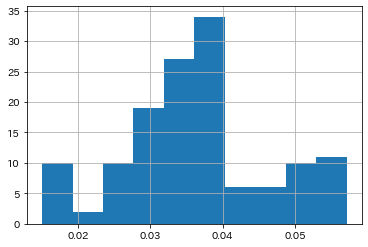

In [36]:
data_df.query('"2011-01-01"<= 年月 <= "2022-03-01"')[['年月', '超過CAPE', '1/CAPE', ]]['超過CAPE'].hist()

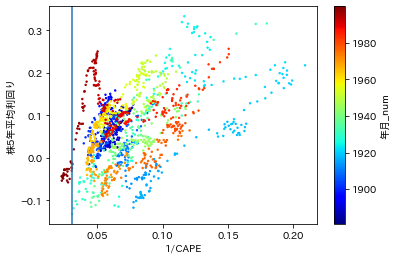

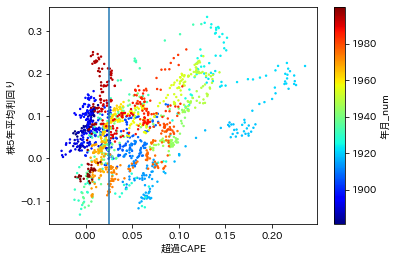

In [26]:
c = '株5年平均利回り'
ax = data_df.query('年月 < "2000-01-01"').plot.scatter(x='1/CAPE', y=c, c='年月_num', s=2, cmap='jet', sharex=False)
ax.axvline(data_df['1/CAPE'].iloc[-1])
ax = data_df.query('年月 < "2000-01-01"').plot.scatter(x='超過CAPE', y=c, c='年月_num', s=2, cmap='jet', sharex=False)
ax.axvline(data_df['超過CAPE'].iloc[-1])